In [14]:
import json

def load_jsonl(f):
    return list(map(lambda x: json.loads(x), open(f).readlines()))

fsrs_6 = load_jsonl("../srs-benchmark/result/FSRS-6.jsonl")
button_usage = load_jsonl("button_usage.jsonl")

users = [(a,b) for a,b in zip(fsrs_6, button_usage)]
users[0]

({'metrics': {'RMSE': 0.401283,
   'LogLoss': 0.495813,
   'RMSE(bins)': 0.111686,
   'ICI': 0.028973,
   'AUC': 0.781486},
  'user': 1,
  'size': 10620,
  'parameters': {'0': [0.2608,
    0.2577,
    0.744,
    3.6667,
    7.257,
    0.3582,
    2.1352,
    0.0386,
    1.2607,
    0.2556,
    0.7138,
    2.092,
    0.0379,
    0.6141,
    2.5124,
    0.4938,
    2.2593,
    0.3452,
    0.4754,
    0.1088,
    0.5755]}},
 {'user': 1,
  'size': 16239,
  'first_rating_prob': [0.0755, 0.0016, 0.6844, 0.2385],
  'review_rating_prob': [0.7195, 0.2142, 0.0663],
  'learn_costs': [47.81, 22.29, 36.73, 16.86],
  'review_costs': [28.15, 14.76, 10.24, 7.51],
  'first_rating_offset': [-1.08, 0.0, -0.24, 0.0],
  'first_session_len': [1.96, 0.0, 1.04, 0.0],
  'forget_rating_offset': -0.22,
  'forget_session_len': 0.95,
  'short_term_recall': [0.7313, 0.0, 0.8888, 0.9045],
  'learning_step_transition': [[111, 0, 380, 33],
   [0, 0, 0, 0],
   [274, 59, 1739, 42]],
  'relearning_step_transition': [[360

In [24]:
def gen_x_y(answer_button_key, metrics_key):
    user1 = users[0]
    assert isinstance(answer_button_key, str)
    assert isinstance(metrics_key, str)
    sorted_users = sorted(users, key=lambda u: u[1][answer_button_key])
    x = [user[1][answer_button_key] for user in sorted_users]
    y = [user[0]["metrics"][metrics_key] for user in sorted_users]
    return x, y

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt
import numpy as np

def plot(x, y, x_key, y_key):
    ax = plt.axes()

    vals = lowess(y, x, it=3, frac=0.1)
    ax.scatter(x, y, s=1)
    ax.plot([x[0] for x in vals], [x[1] for x in vals], color="orange")

    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)

    ax.plot()

def simple_plot(x_key, y_key):
    plot(*gen_x_y(x_key, y_key), x_key, y_key)


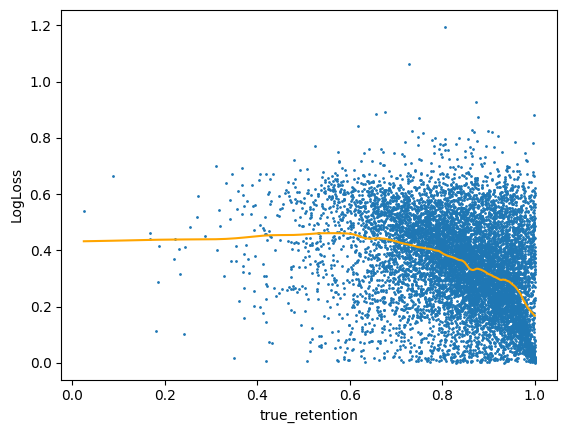

In [34]:
simple_plot("true_retention", "LogLoss")

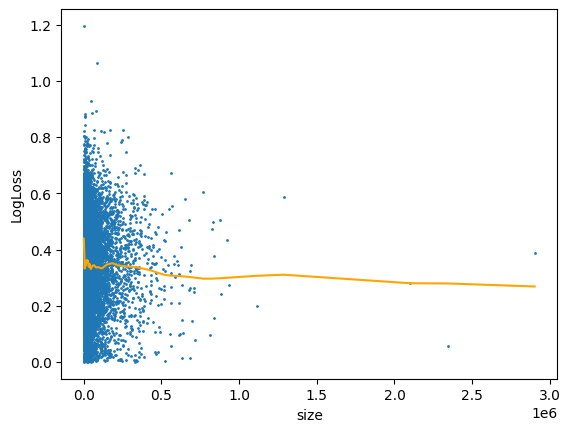

In [33]:
simple_plot("size", "LogLoss")

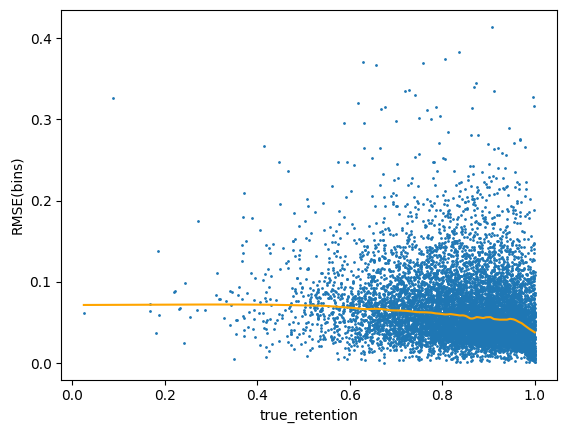

In [27]:
simple_plot("true_retention", "RMSE(bins)")

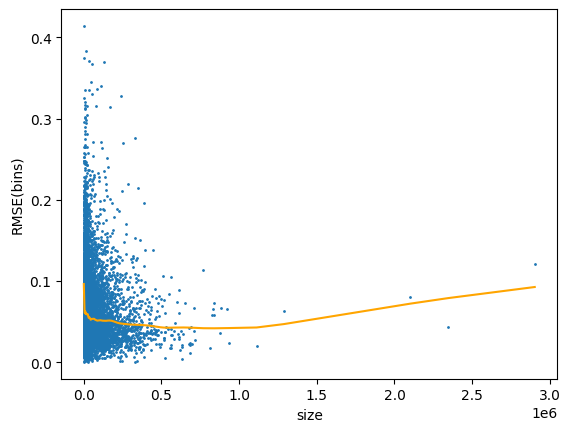

In [29]:
simple_plot("size", "RMSE(bins)")

# Trying to generate a trend line for LogLoss and Retention

In [41]:
x,y = gen_x_y("true_retention", "LogLoss")

coefficients = np.polyfit(x, y, 3)
print(coefficients)

def retention_factor(r, x):
    return x - np.polyval(coefficients, r)

adjusted_loss = retention_factor(x, y)


[-1.27725465  1.67207606 -0.69569746  0.5245289 ]


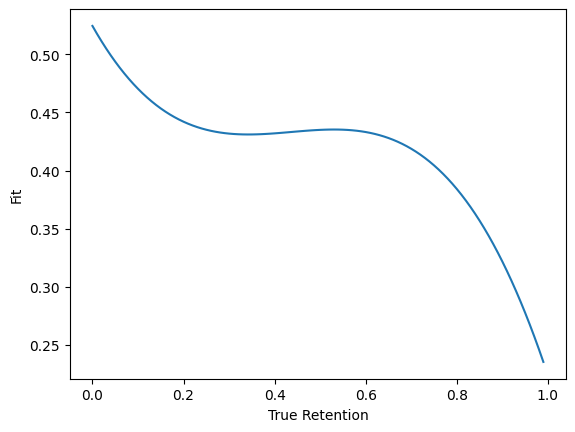

In [42]:
ax = plt.axes()

ax.set_xlabel("True Retention")
ax.set_ylabel("Fit")

ax.plot(np.arange(100) / 100, -retention_factor(np.arange(100) / 100, 0))

(array([ 18.,  34.,  53.,  68.,  89.,  95., 105., 146., 293., 340., 391.,
        395., 444., 538., 560., 630., 624., 670., 638., 621., 560., 512.,
        428., 387., 351., 236., 220., 172., 117.,  70.,  72.,  32.,  30.,
         28.,   8.,   7.,   6.,   5.,   1.,   1.,   1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-0.42825003, -0.40339424, -0.37853845, -0.35368266, -0.32882688,
        -0.30397109, -0.2791153 , -0.25425951, -0.22940372, -0.20454793,
        -0.17969214, -0.15483635, -0.12998056, -0.10512478, -0.08026899,
        -0.0554132 , -0.03055741, -0.00570162,  0.01915417,  0.04400996,
         0.06886575,  0.09372154,  0.11857732,  0.14343311,  0.1682889 ,
         0.19314469,  0.21800048,  0.24285627,  0.26771206,  0.29256785,
         0.31742364,  0.34227943,  0.36713521,  0.391991  ,  0.41684679,
         0.44170258,  0.46655837,  0.49141416,  0.51626995,  0.54112574,
         0.56598153,  0.59083731,  0.6156931 ,  0.64054889,  0.66540468,
 

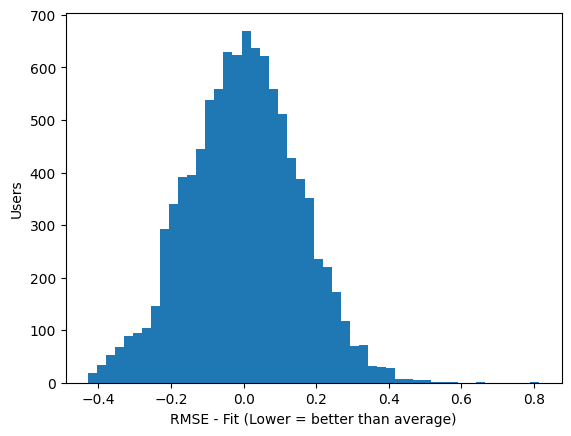

In [43]:
ax = plt.axes()

ax.set_xlabel("RMSE - Fit (Lower = better than average)")
ax.set_ylabel("Users")

ax.hist(adjusted_loss, bins=50)